# Clustering Assignments

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd
df = pd.read_csv('../Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [2]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
data = df.drop(columns=['Cereal Name', 'Manufacturer'])
data

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25
...,...,...,...,...,...
69,110,2,1,3,25
70,110,1,1,12,25
71,100,3,1,3,25
72,100,3,1,3,25


In [3]:
# 3. Fit a K-Means Clustering model with 2 clusters
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ghummatova\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, 

KMeans(n_clusters=2, random_state=42)

In [4]:
# 4. Interpret the cluster centers
data.columns

Index(['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals'], dtype='object')

In [5]:
cluster_center2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
cluster_center2

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,104.558824,2.485294,0.955882,6.808824,22.058824
1,116.666667,2.666667,0.833333,6.333333,100.000000


<Axes: >

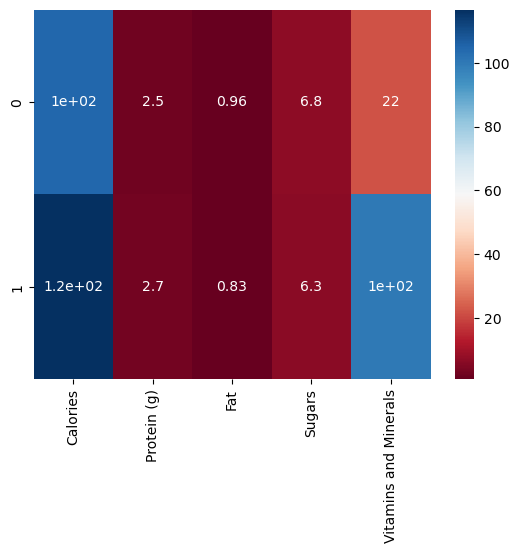

In [6]:
import seaborn as sns
sns.heatmap(cluster_center2, cmap = "RdBu", annot=True)

In [ ]:
# cluster 0: low vitamin and calorie
# cluster 1: high vitamin and calorie   

## 2. Inertia Plot

In [ ]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertias =[]
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init = 'auto', random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
print(inertias)

[30041.730392156867, 17167.537634408603, 12430.331666666667, 9765.241666666669, 7403.834045584046, 5690.000712250712, 3951.4481481481484, 3097.2814814814815, 2676.4481481481484, 2078.190572390572, 1657.5700534759355, 1281.7145104895103, 1178.2145104895103]


c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

In [11]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
inertia_series = pd.Series(inertias, index =range(2,15))
inertia_series

2     30041.730392
3     17167.537634
4     12430.331667
5      9765.241667
6      7403.834046
7      5690.000712
8      3951.448148
9      3097.281481
10     2676.448148
11     2078.190572
12     1657.570053
13     1281.714510
14     1178.214510
dtype: float64

<Axes: >

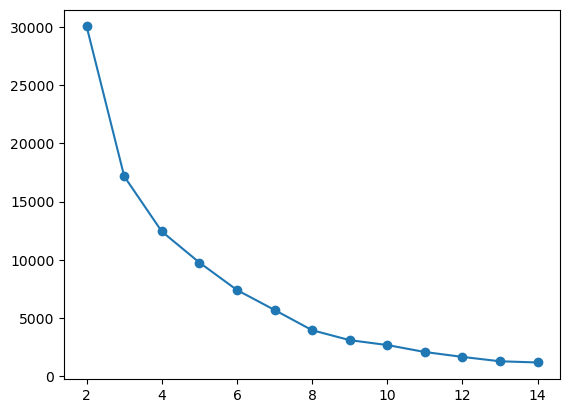

In [15]:
import matplotlib.pyplot as plt

inertia_series.plot(marker ='o')

In [ ]:
# 3. Identify the elbow of the plot
# maybe k=3 or k=4

In [16]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans3 = KMeans(n_clusters=3, n_init ='auto', random_state=42)
kmeans3.fit(data)
kmeans3_df = pd.DataFrame(kmeans3.cluster_centers_, columns = data.columns)
kmeans3_df

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,108.709677,2.451613,1.016129,7.290323,22.983871
1,116.666667,2.666667,0.833333,6.333333,100.000000
2,61.666667,2.833333,0.333333,1.833333,12.500000


In [17]:
kmeans4 = KMeans(n_clusters=4, n_init ='auto', random_state=42)
kmeans4.fit(data)
kmeans4_df = pd.DataFrame(kmeans4.cluster_centers_, columns = data.columns)
kmeans4_df

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,115.250000,2.225000,1.225000e+00,8.750000,24.375000
1,116.666667,2.666667,8.333333e-01,6.333333,100.000000
2,50.000000,2.333333,1.110223e-16,0.000000,8.333333
3,94.000000,2.920000,6.400000e-01,4.520000,20.000000


<Axes: >

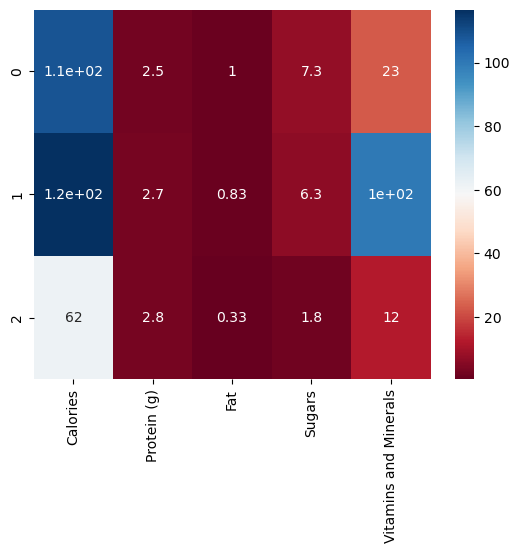

In [24]:
# 5. Interpret the cluster centers using a heat map
sns.heatmap(kmeans3_df, cmap='RdBu', annot = True)

<Axes: >

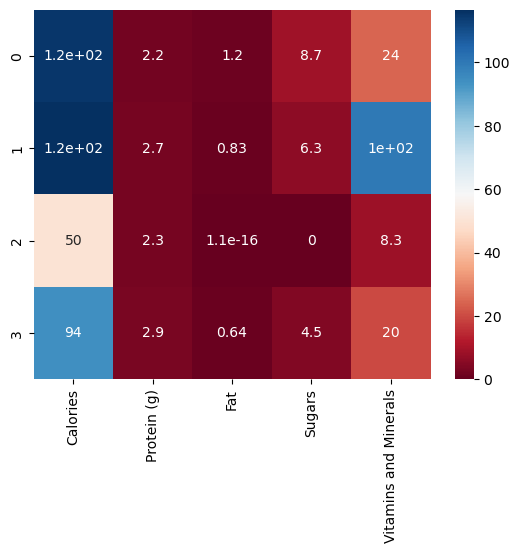

In [25]:
sns.heatmap(kmeans4_df, cmap='RdBu', annot = True)

## 3. Tune the K-Means Model

In [16]:
# 1. Remove the ”Fat” column
data_tuned = data.drop(columns=['Fat'])
data_tuned

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25
...,...,...,...,...
69,110,2,3,25
70,110,1,12,25
71,100,3,3,25
72,100,3,3,25


In [17]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data_std = std.fit_transform(data_tuned)

data_std = pd.DataFrame(data_std, columns = data_tuned.columns)
data_std

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270
...,...,...,...,...
69,0.243458,-0.462464,-0.849659,-0.149270
70,0.243458,-1.387392,1.178559,-0.149270
71,-0.302478,0.462464,-0.849659,-0.149270
72,-0.302478,0.462464,-0.849659,-0.149270


In [30]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertias=[]
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init = 'auto', random_state=42)
    kmeans.fit(data_std)
    inertias.append(kmeans.inertia_)
print(inertias)

[204.64648585518302, 170.49358018954837, 116.63218617365139, 94.96316532688384, 74.71032865075318, 65.48996762662279, 60.1930996574571, 51.07211201176042, 41.851750987630034, 33.90791728854866, 30.832276819929092, 27.177882166622112, 25.001300070054366, 22.046222105861077]


c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

<Axes: >

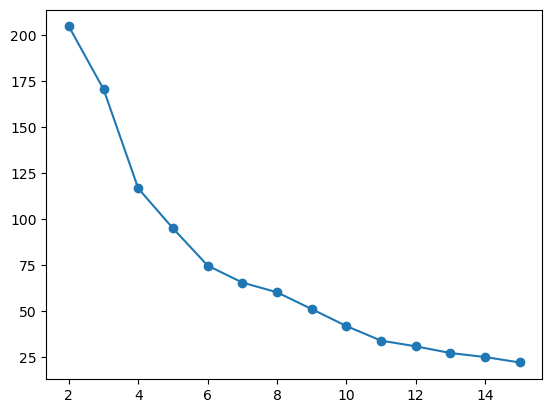

In [33]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
inertia_series = pd.Series(inertias, index = range(2,16))
inertia_series.plot(marker = 'o')

In [ ]:
# 3c. Identify the elbow of the plot
# k =6

In [34]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init = 'auto', random_state=42)
kmeans6.fit(data_std)
cluster_center6 = pd.DataFrame(kmeans6.cluster_centers_, columns = data_std.columns)
cluster_center6

c:\Users\ghummatova\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Calories,Protein (g),Sugars,Vitamins and Minerals
0,1.171549,0.369971,0.795451,-0.259730
1,-0.127779,-0.092493,-0.471058,-0.149270
2,-0.575446,1.965471,-0.708810,-0.287345
3,0.607415,0.154155,-0.098467,3.164532
4,0.273788,-1.027697,1.153519,-0.149270
5,-1.784304,0.066066,-1.525731,-1.096071


<Axes: >

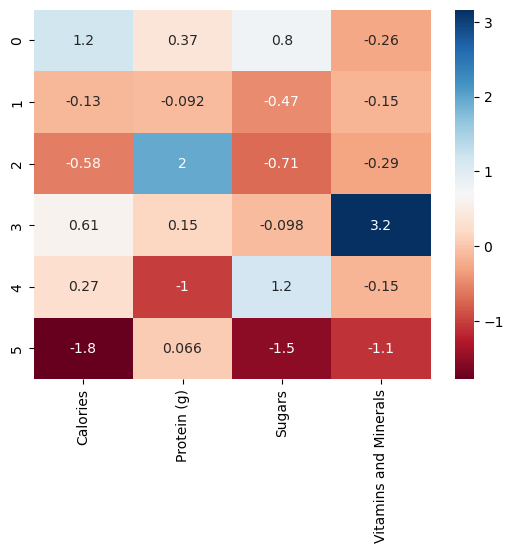

In [35]:
# 3e. Interpret the cluster centers using a heat map
sns.heatmap(cluster_center6, cmap='RdBu', annot = True)

## 4. Select the Best K-Means Model

In [ ]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model


In [ ]:
# 2. Look at the number of cereals that fall into each cluster


In [ ]:
# 3. Decide on the best model for our client


In [ ]:
# 4. Recommend a specific number of displays


In [ ]:
# 5. Suggest a few cereals that should be shown in each display


## 5. Hierarchical Clustering

Text(0, 0.5, 'Euclidean Distance')

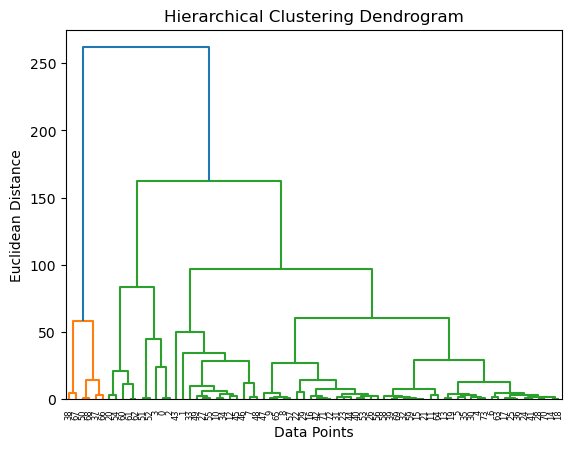

In [ ]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(data, method ='ward')
dendrogram_data = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

Text(0, 0.5, 'Euclidean Distance')

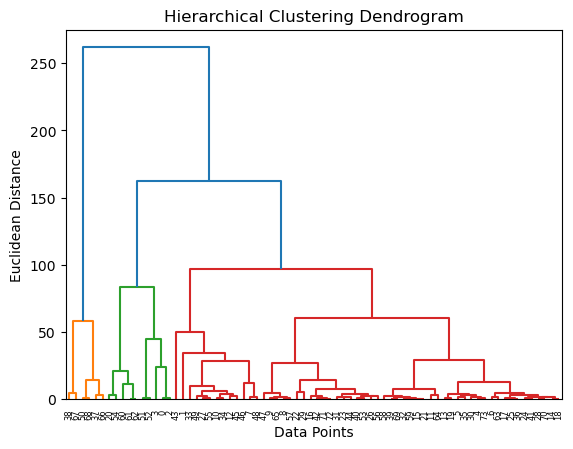

In [12]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold
dendrogram_data = dendrogram(linkage_matrix, color_threshold=100)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

Text(0.5, 1.0, 'Clustering Dendrogram with standadized data')

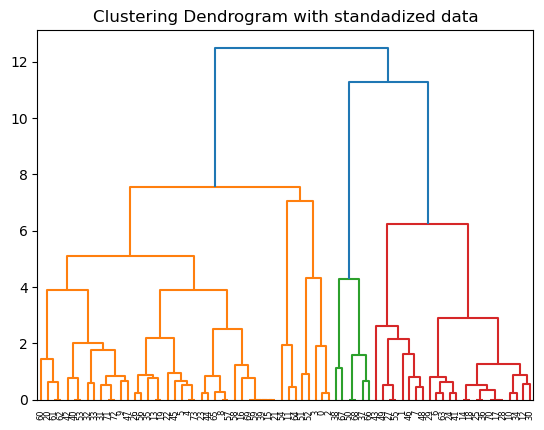

In [19]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set
linkage_matrix_std = linkage(data_std, method = 'ward')
dendrogram_data_std = dendrogram(linkage_matrix_std)
plt.title('Clustering Dendrogram with standadized data')

Text(0, 0.5, 'Euclidean Distance')

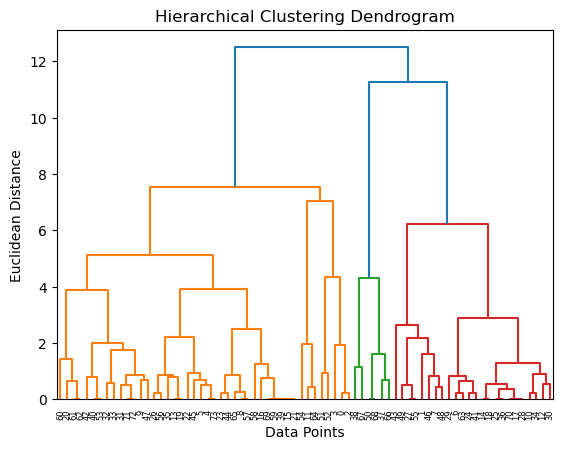

In [21]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold
# k=4
dendrogram_data_std = dendrogram(linkage_matrix_std, color_threshold=8)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")


In [22]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(4)
agg.fit(data_std)

AgglomerativeClustering(n_clusters=4)

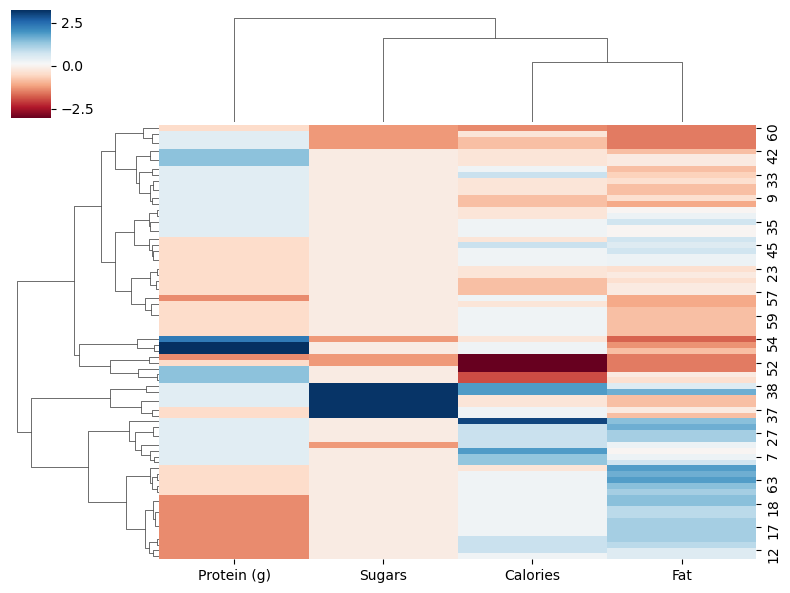

In [ ]:
# 6. Create a cluster map of the “best” results and interpret the clusters
cluster_map = sns.clustermap(data_std, method = 'ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns)


## 6. DBSCAN

In [24]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [27]:
# 2. Apply the function on both the original and standardized data sets
dbscan_results_std=tune_dbscan(data_std)

In [29]:
dbscan_results =tune_dbscan(data)
dbscan_results

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,7,59,-0.302829
1,0.1,3,1,71,NaN
2,0.1,4,0,74,NaN
3,0.1,5,0,74,NaN
4,0.1,6,0,74,NaN
...,...,...,...,...,...
147,1.9,5,4,46,-0.063081
148,1.9,6,2,57,-0.152856
149,1.9,7,2,57,-0.152856
150,1.9,8,1,64,NaN


In [30]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results.sort_values('Silhouette Score', ascending= False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,12,23,0.230822
144,1.9,2,12,23,0.230822
120,1.6,2,13,25,0.154347
112,1.5,2,13,25,0.154347
128,1.7,2,13,25,0.154347
...,...,...,...,...,...
135,1.7,9,1,65,NaN
142,1.8,8,1,64,NaN
143,1.8,9,1,65,NaN
150,1.9,8,1,64,NaN


In [31]:
dbscan_results_std.sort_values('Silhouette Score', ascending= False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
144,1.9,2,3,0,0.43509
136,1.8,2,3,0,0.43509
145,1.9,3,2,2,0.43509
146,1.9,4,2,2,0.43509
137,1.8,3,2,2,0.43509
...,...,...,...,...,...
147,1.9,5,1,6,NaN
148,1.9,6,1,8,NaN
149,1.9,7,1,8,NaN
150,1.9,8,1,8,NaN


In [32]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
dbscan_tuned = DBSCAN(eps=1.8, min_samples=2)

dbscan_tuned.fit(data)

DBSCAN(eps=1.8, min_samples=2)

In [33]:
dbscan_tuned_std = DBSCAN(eps=1.9, min_samples=2)

dbscan_tuned.fit(data_std)

DBSCAN(eps=1.8, min_samples=2)